In [20]:
# Projeto Ciência de Dados - Previsão de Vendas

In [21]:
# Passo a Passo de um Projeto de Ciência de Dados
    # Passo 1: Entendimento do Desafio
    # Passo 2: Entendimento da Área/Empresa
    # Passo 3: Extração/Obtenção de Dados
    # Passo 4: Ajuste de Dados (Tratamento/Limpeza)
    # Passo 5: Análise Exploratória
    # Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    # Passo 7: Interpretação de Resultados

In [22]:
# Projeto Ciência de Dados - Previsão de Vendas
    # Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos 
    # em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
    # TV, Jornal e Rádio estão em milhares de reais
    # Vendas estão em milhões

In [1]:
# Importar a Base de dados
import pandas as pd

tabela = pd.read_csv('advertising.csv')
tabela.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


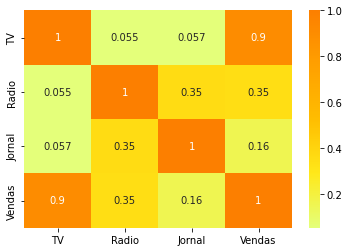

In [4]:
# Analise Exploratoria
#     .Vamos tentar vizualizar como as informações de cada item estão distribuidas
#     .Vamos ver a correlaçao entre cada um dos itens

import seaborn as sns
import matplotlib.pyplot as plt


# cria o grafico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# exibe o grafico
plt.show()

In [3]:
# Com isso podemos partir para a preparação dos dados para treinarmos em modelo Machine Learning
    # .Separando em dados de treino e dados de teste
# x -> o resto (quem você vai usar pra fazer a previsão) ----- O que restar da tabela fica como X
# y -> quem você quer prever ----- Eu quero prever as vendas então meu Y
y = tabela['Vendas']
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino,y_teste = train_test_split(x,y, test_size=0.3, random_state=1)


In [5]:
# Temos um problema de regressão - Vamos escolher os modelos que vamos usar:
    # .Regressão Linear
    # .RandomForest (Árvore de Decisão)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [6]:
# Teste da AI e Avaliação do Melhor modelo
#     .Vamos usar o R² - > diz o % que o nosso modelo consegue explicar o que acontece

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao =  modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9638073019040665


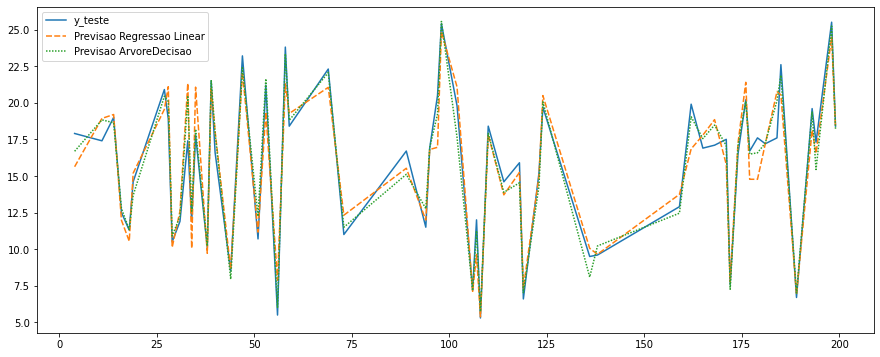

In [8]:
# Visualização Grafica das Previsoes, (arvore de decisao ganhou como melhor modelo e vamos usar para previsões)
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao ArvoreDecisao'] = previsao_arvoredecisao

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [10]:
# Como fazer uma nova previsao ?
# importar a tabela com as novas informações para prever
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)
# usar o modelo da arvore de decisao e fazer um .predict com ele
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.598  8.524 19.999]
